In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
pd.set_option('display.max_rows',100)

In [9]:
df = pd.read_csv("imputed_final_deleted.csv")

In [10]:
y= df['class']
X= df[df.columns[df.columns!='class']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [12]:
print(len(y_test[y_test.isin([1])]))
print(len(y_train[y_train.isin([1])]))

58
303


In [13]:
import numpy as np
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.decomposition import PCA, TruncatedSVD
import random
import math
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


seed = 5
np.random.seed(seed)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [9]:
forest = RandomForestClassifier(random_state=5, class_weight='balanced')

In [11]:
n_estimators = [100, 200, 300]
max_features = ['auto', 'sqrt', 0.2, 0.3]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              max_features = max_features,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [12]:
gridF = GridSearchCV(forest, hyperF, cv=10, n_jobs=-1)

bestF = gridF.fit(X_scaled, y_train)

In [13]:
bestF.best_params_

{'max_depth': 25,
 'max_features': 0.3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [14]:
bestF.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=0.3,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=5)

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
# evaluate model
scores = cross_val_score(bestF.best_estimator_, X_scaled, y_train, scoring='f1', cv=cv, n_jobs=-1)

# summarize performance
print('F1 Score: %.5f' % mean(scores))

F1 Score: 0.21767


In [15]:
forestOpt = RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=0.3,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=5)
modelOpt = forestOpt.fit(X_scaled, y_train)

In [17]:
modelOpt.feature_importances_

array([0.02164342, 0.02466267, 0.03204644, 0.05231261, 0.03869008,
       0.04409231, 0.04121796, 0.11333371, 0.07810231, 0.0368372 ,
       0.014761  , 0.0677515 , 0.0220586 , 0.05353794, 0.02872352,
       0.01577381, 0.01940269, 0.01680171, 0.0259015 , 0.02270719,
       0.01993387, 0.03647108, 0.0129531 , 0.02672875, 0.02543923,
       0.02259624, 0.01798103, 0.02233684, 0.02506718, 0.0201345 ])

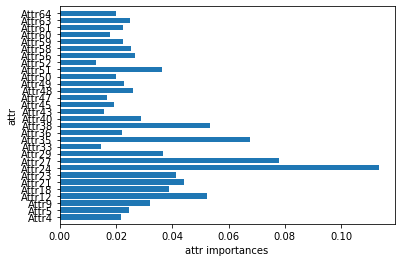

In [18]:
def plot_feature_importances(model): 
    n_features = X_scaled.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X.columns))
    plt.xlabel('attr importances')
    plt.ylabel('attr')
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances(modelOpt)

In [4]:
from joblib import dump, load

In [16]:
file_name = 'forest_01.pkl'
dump(modelOpt, file_name)

['forest_01.pkl']